<a href="https://colab.research.google.com/github/Rohit-Madhesiya/ML_Colab_Repos/blob/main/DL3_DogCatClassification_using_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transfer Learning** is a Deep Learning technique where we use a pre-trained model. This pre-trained model is trained for one taks and can be re-trained for a similar task with a smaller dataset.

Transfer Learning gives higher accuracy compared to training models from scratch.

**Examples of Pre-Trained Models:**


*   VGG-16
*   ResNet50
*   Inceptionv3
*   MobileNet V2



In [14]:
# installing kaggle library
!pip install kaggle

In [15]:
# configuring path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
# importing dataset from kaggle
# kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:09<00:00, 76.4MB/s]
100% 812M/812M [00:09<00:00, 90.7MB/s]


In [17]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [18]:
# Extracting the compressed file
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted.')

The dataset is extracted.


In [19]:
train_dataset='/content/train.zip'
with ZipFile(train_dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted.')

The dataset is extracted.


In [20]:
import os
# counting the no. of files in train dir

path,dir,files=next(os.walk('/content/train'))
file_count=len(files)
print('Number of Images in train dataset: ',file_count)

Number of Images in train dataset:  25000


Printing the name of the images

In [21]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.10214.jpg', 'cat.376.jpg', 'cat.8637.jpg', 'dog.8390.jpg', 'dog.11620.jpg', 'cat.2630.jpg', 'dog.9577.jpg', 'dog.4354.jpg', 'dog.10831.jpg', 'cat.4030.jpg', 'cat.11491.jpg', 'dog.3807.jpg', 'cat.2932.jpg', 'dog.1123.jpg', 'dog.1891.jpg', 'dog.582.jpg', 'cat.2616.jpg', 'cat.11643.jpg', 'cat.9154.jpg', 'dog.3325.jpg', 'dog.6093.jpg', 'cat.9982.jpg', 'dog.480.jpg', 'dog.850.jpg', 'cat.4420.jpg', 'cat.4497.jpg', 'cat.10199.jpg', 'cat.8524.jpg', 'cat.2655.jpg', 'cat.8271.jpg', 'cat.11050.jpg', 'cat.9798.jpg', 'cat.3650.jpg', 'cat.7323.jpg', 'dog.11677.jpg', 'dog.10742.jpg', 'cat.3678.jpg', 'cat.6698.jpg', 'dog.10533.jpg', 'dog.3190.jpg', 'dog.6327.jpg', 'cat.10773.jpg', 'cat.6820.jpg', 'dog.7292.jpg', 'cat.9437.jpg', 'dog.371.jpg', 'dog.5026.jpg', 'dog.10424.jpg', 'dog.6419.jpg', 'cat.6685.jpg', 'cat.8060.jpg', 'dog.6875.jpg', 'dog.5056.jpg', 'dog.801.jpg', 'dog.6823.jpg', 'cat.3866.jpg', 'dog.8729.jpg', 'dog.9506.jpg', 'dog.12183.jpg', 'cat.12079.jpg', 'dog.2661.jpg', 'cat.9900.jpg',

**Importing Libraries**

In [22]:
# Importing the Dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Display the image of Dog and Cat

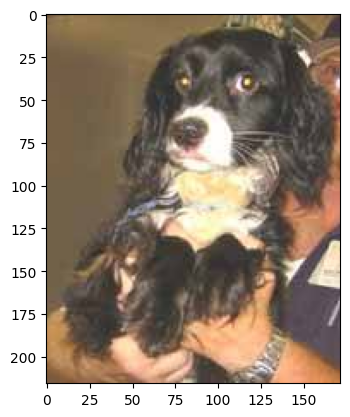

In [23]:
# Displaying the images of dogs
img=mpimg.imread('/content/train/dog.5547.jpg')
imgplot=plt.imshow(img)
plt.show()

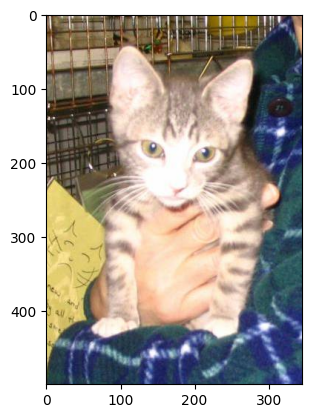

In [24]:
img=mpimg.imread('/content/train/cat.6170.jpg')
imgplot=plt.imshow(img)
plt.show()



---


**Resizing all the images** \\
224 x 224 Image Resolution

In [25]:
# creating a separate dir for resized images
os.mkdir('/content/image_resized')

In [28]:
original_dir='/content/train/'
resized_dir='/content/image_resized/'

for i in range(2000):
  file_name=os.listdir(original_dir)[i]
  img_path=original_dir+file_name
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  newpath=resized_dir+file_name
  img.save(newpath)

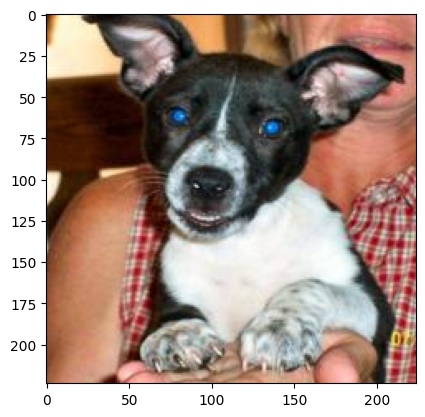

In [30]:
# Displaying the resized image of dogs
img=mpimg.imread('/content/image_resized/dog.10048.jpg')
imgplot=plt.imshow(img)
plt.show()

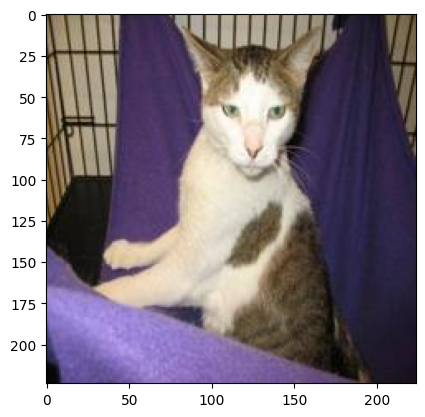

In [32]:
img=mpimg.imread('/content/image_resized/cat.9798.jpg')
imgplot=plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats \\

Cat-->0 \\
Dog-->1


In [33]:
# creating a for loop to assign labels
filenames=os.listdir('/content/image_resized/')

labels=[]

for i in range(2000):
  file_name=filenames[i]
  if file_name.startswith('cat'):
    labels.append(0)
  else:
    labels.append(1)

In [34]:
print(filenames[0:5])
print(len(filenames))

['cat.10214.jpg', 'cat.376.jpg', 'cat.8637.jpg', 'dog.8390.jpg', 'dog.11620.jpg']
2000


In [35]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 1]
2000


In [36]:
# counting the images of dogs and cats in resized images
values,counts=np.unique(labels,return_counts=True)
print(values, counts)

[0 1] [ 985 1015]


Converting all the resized images to numpy images

In [37]:
import cv2
import glob

In [38]:
img_dir='/content/image_resized/'
img_ext=['png','jpg']

files=[]

[files.extend(glob.glob(img_dir+'*.'+ i)) for i in img_ext]

dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [39]:
print(dog_cat_images)

[[[[167 147 129]
   [162 142 124]
   [143 123 105]
   ...
   [ 15  13  19]
   [ 15  13  19]
   [ 14  12  18]]

  [[165 145 127]
   [164 144 126]
   [146 126 108]
   ...
   [ 16  14  20]
   [ 15  13  19]
   [ 15  13  19]]

  [[148 128 111]
   [152 132 115]
   [140 120 102]
   ...
   [ 17  15  21]
   [ 16  14  20]
   [ 16  14  20]]

  ...

  [[158  98 108]
   [160 101 115]
   [173 116 137]
   ...
   [189 157 216]
   [187 148 216]
   [176 136 208]]

  [[188 131 139]
   [188 132 143]
   [180 125 144]
   ...
   [206 175 230]
   [208 171 235]
   [200 159 226]]

  [[212 156 161]
   [205 150 159]
   [182 127 146]
   ...
   [212 182 235]
   [227 189 249]
   [227 185 250]]]


 [[[ 18  45  35]
   [ 28  55  45]
   [ 26  53  43]
   ...
   [ 30  87  48]
   [ 27  87  47]
   [ 23  83  43]]

  [[ 10  37  27]
   [ 28  55  45]
   [ 35  62  52]
   ...
   [ 22  79  40]
   [ 25  85  45]
   [ 13  73  33]]

  [[ 23  51  38]
   [ 35  63  50]
   [ 34  64  51]
   ...
   [ 19  76  37]
   [ 36  96  56]
   [ 24  84

In [40]:
type(dog_cat_images)

numpy.ndarray

In [41]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [42]:
X=dog_cat_images
Y=np.asarray(labels)

Splitting Image Data in Train and Test Data

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [44]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1600, 224, 224, 3) (400, 224, 224, 3) (1600,) (400,)


In [45]:
# Scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [46]:
print(X_train_scaled)

[[[[0.8        0.79215686 0.79215686]
   [0.8        0.79215686 0.78823529]
   [0.77254902 0.76862745 0.75294118]
   ...
   [0.17647059 0.35294118 0.5254902 ]
   [0.18823529 0.36470588 0.53333333]
   [0.2        0.37647059 0.54509804]]

  [[0.81176471 0.80392157 0.80392157]
   [0.80392157 0.79607843 0.79215686]
   [0.77647059 0.77254902 0.75686275]
   ...
   [0.18431373 0.36078431 0.53333333]
   [0.18431373 0.36078431 0.52941176]
   [0.18823529 0.36470588 0.53333333]]

  [[0.82745098 0.81960784 0.81960784]
   [0.80392157 0.79607843 0.79215686]
   [0.78431373 0.77254902 0.75686275]
   ...
   [0.19215686 0.36862745 0.54117647]
   [0.18039216 0.35686275 0.5254902 ]
   [0.17254902 0.34901961 0.51764706]]

  ...

  [[0.83529412 0.88627451 0.85490196]
   [0.83921569 0.89019608 0.85882353]
   [0.81568627 0.8627451  0.83921569]
   ...
   [0.58431373 0.7254902  0.74901961]
   [0.58823529 0.72941176 0.75294118]
   [0.59215686 0.73333333 0.75686275]]

  [[0.83921569 0.89019608 0.85882353]
   [0.8

**Building the Neural Network**

---
**Using Pre-Trained Model called MobileNet**



In [60]:
!pip install --upgrade tensorflow-hub
!pip install tf_keras


In [61]:
import tensorflow as tf
import tensorflow_hub as tf_hub
import tf_keras

In [62]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pre_trained_model=tf_hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [64]:
# Types of Images classification
num_of_classes=2

model=tf_keras.Sequential([

    pre_trained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

model.compile(
    optimizer='adam',
    loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [66]:
model.fit(X_train_scaled,Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 79s 1s/step - loss: 0.2698 - acc: 0.8856
Epoch 2/5
50/50 [==============================] - 73s 1s/step - loss: 0.0781 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 68s 1s/step - loss: 0.0628 - acc: 0.9787
Epoch 4/5
50/50 [==============================] - 67s 1s/step - loss: 0.0497 - acc: 0.9844
Epoch 5/5
50/50 [==============================] - 70s 1s/step - loss: 0.0426 - acc: 0.9856


In [67]:
score,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Loss: ',score)
print('Test Accuracy: ',accuracy)

13/13 [==============================] - 20s 1s/step - loss: 0.0679 - acc: 0.9700
Test Loss:  0.06794153153896332
Test Accuracy:  0.9700000286102295


**Building Predictive System**

Path of the image: /content/image_resized/cat.9798.jpg


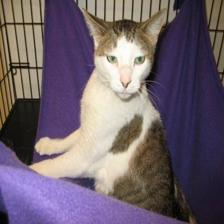

1/1 [==============================] - 1s 691ms/step
The image is of a Cat


In [68]:
input_img_path=input('Path of the image: ')
input_img=cv2.imread(input_img_path)
# displaying img
cv2_imshow(input_img)

resized_input_img=cv2.resize(input_img,(224,224))
# Scaling the image
resized_input_img_scaled=resized_input_img/255

img_reshaped=np.reshape(resized_input_img_scaled,[1,224,224,3])

input_predict=model.predict(img_reshaped)

predict_label=np.argmax(input_predict)

if predict_label==0:
  print('The image is of a Cat')
else:
  print('The image is of a Dog')